# 선형회귀

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 단순선형회귀 모델 만들기

In [7]:
X = np.random.ranf(100)
y = 0.2 * X + 0.5 # 회귀선

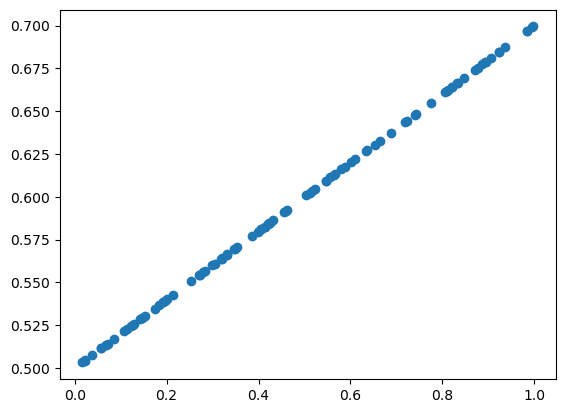

In [8]:
plt.scatter(X,y)

In [9]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

# 경사하강법: 목적함수(비용함수, 손실함수)를 최소화하는 값(최적의 파라미터)를 찾는 방법

In [10]:
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learing_rate = 0.05

미분이란? 어떤 함수가 변화할 때, 그 변화율을 수학적으로 나타내는 것을 의미

즉, 회귀분석의 최적의 회귀식을 찾기 위해서는 편미분(X,w 변수로 따로 미분)해야한다.

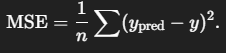

위 식을 W로 편미분하면

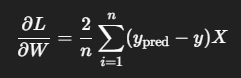

식이 나오고 여기서 앞의 상수(2)를 빼는 이유는 

경사하강법은 기울기의 방향과 상대적 크기만 맞으면 되기 때문.

(2는 그냥 학습률에 적용되고 큰 영향이 없음.)

-> b도 마찬가지임


Epoch:0, W:0.272992, error: 0.245610


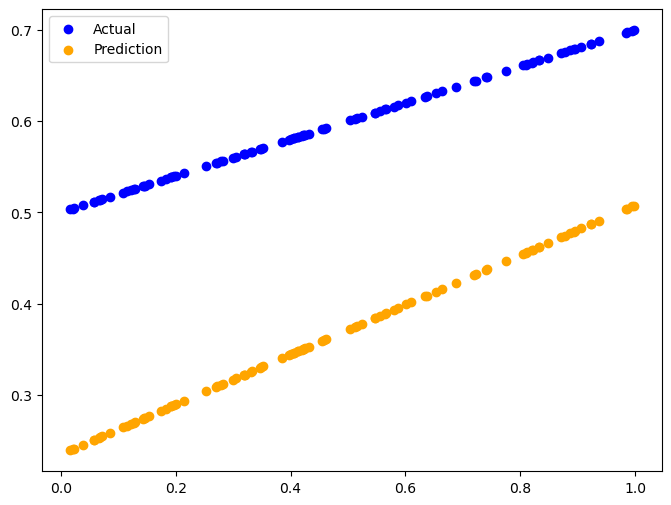

Epoch:10, W:0.310753, error: 0.132257


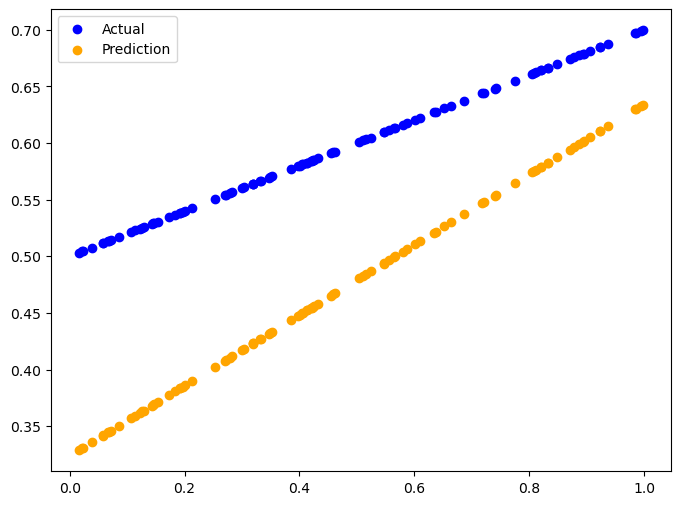

Epoch:20, W:0.328361, error: 0.072250


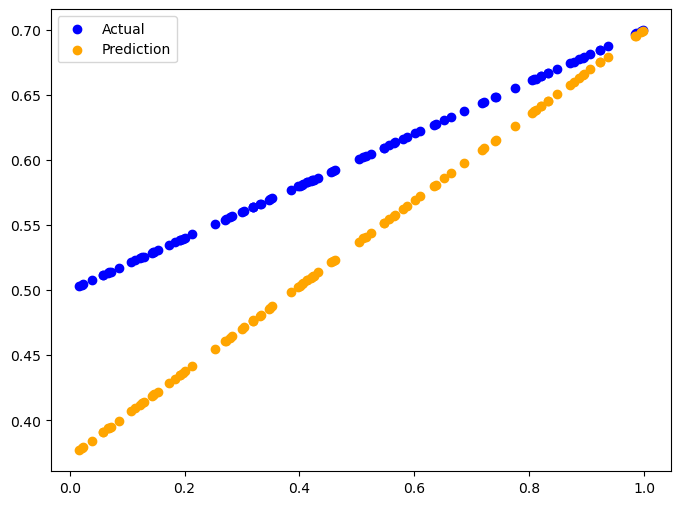

Epoch:30, W:0.335390, error: 0.047291


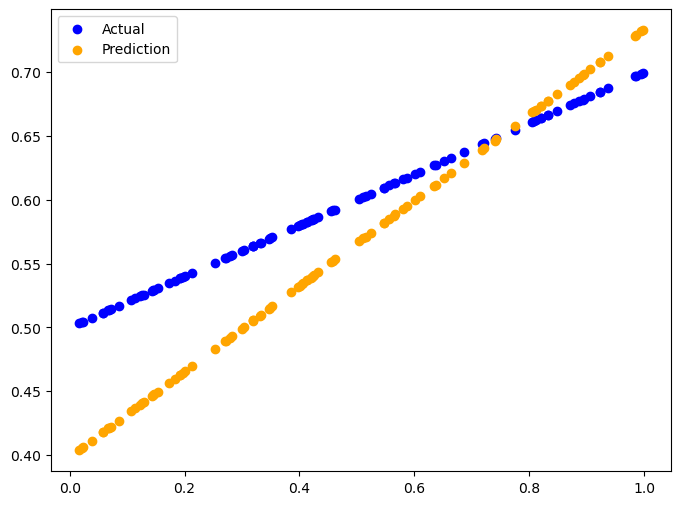

Epoch:40, W:0.336902, error: 0.039399


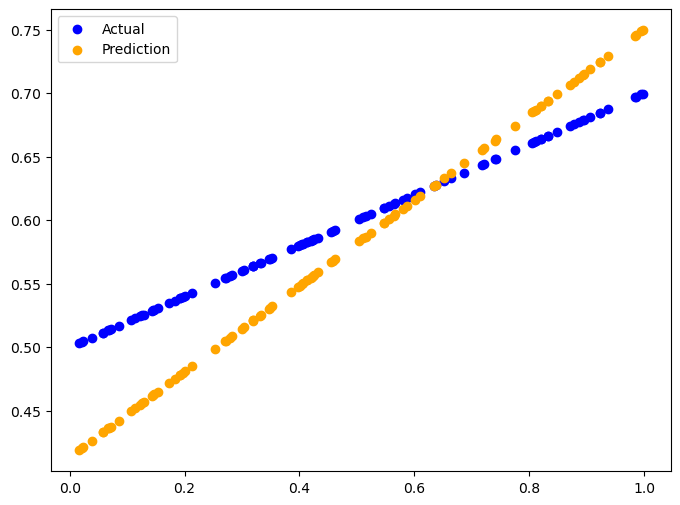

Epoch:50, W:0.335569, error: 0.035910


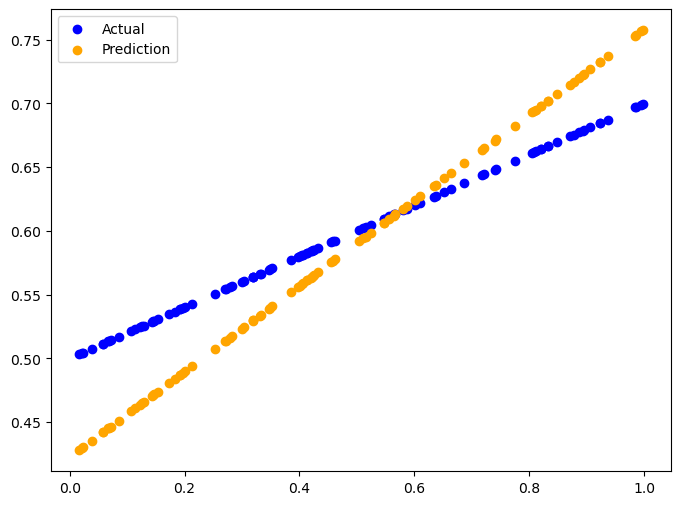

Epoch:60, W:0.332801, error: 0.034038


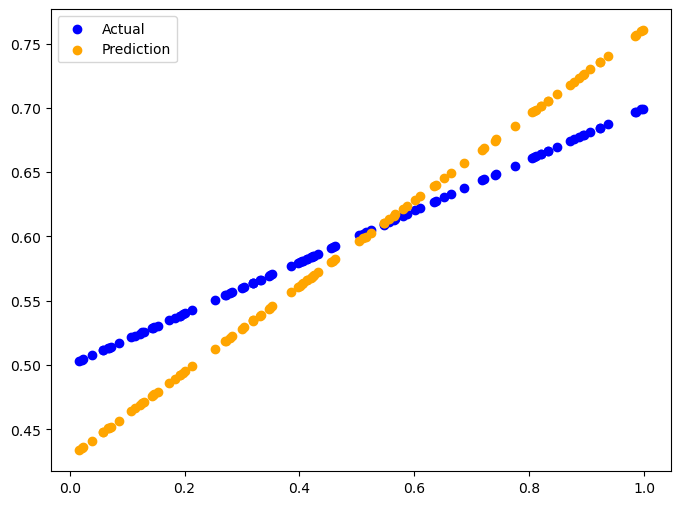

Epoch:70, W:0.329341, error: 0.032694


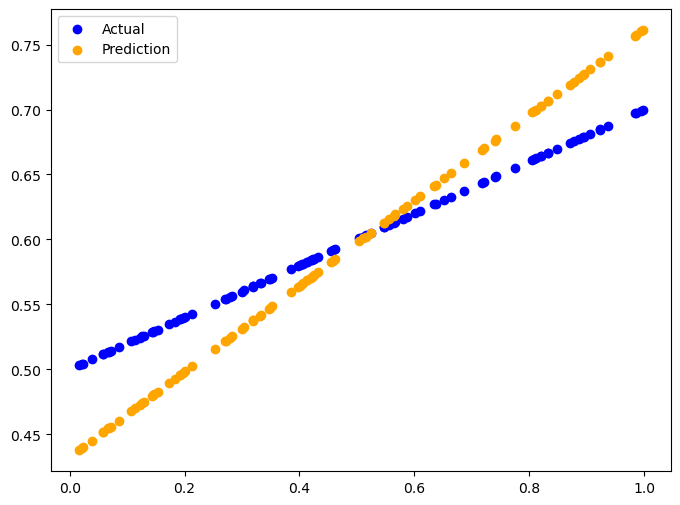

Epoch:80, W:0.325582, error: 0.031532


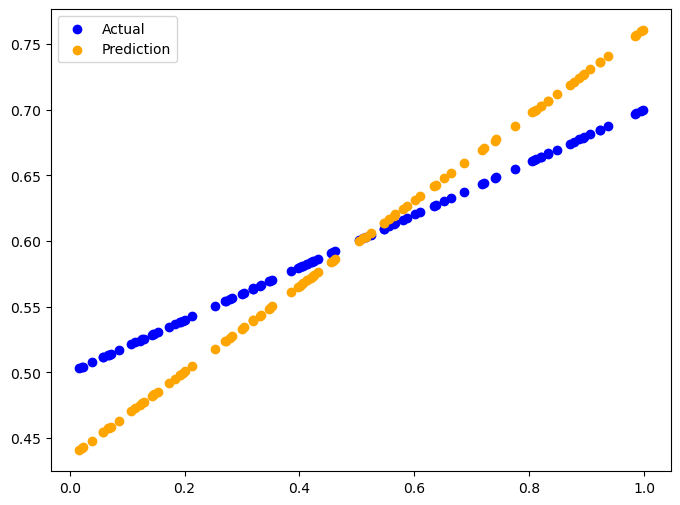

Epoch:90, W:0.321727, error: 0.030471


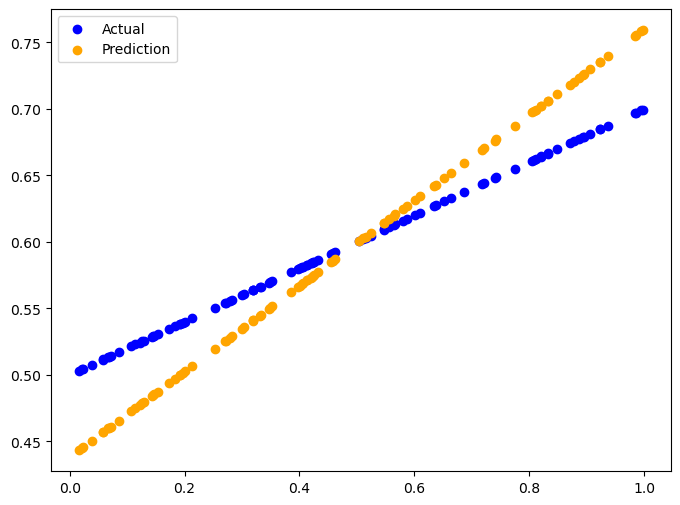

In [11]:
for epoch in range(100):
    y_pred = W * X + b
    error = np.abs(y_pred - y).mean()
    if error < 0.001:
        break
    W_descent = learing_rate * ((y_pred - y)*X).mean()
    b_descent =learing_rate * ((y_pred - y).mean())
    
    W = W - W_descent
    b = b - b_descent
    
    if epoch % 10 == 0:
        print(f'Epoch:{epoch}, W:{W :4f}, error:{error : 4f}')
        y_pred = W * X + b
        plt_prediction(y_pred, y)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd

In [13]:
boston_df = pd.read_csv('./data/boston.csv')

In [14]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [22]:
X = boston_df.drop(columns='target')
y = boston_df['target']
boston_df.shape

(506, 14)

In [16]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [18]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse, mse)

4.15895610795571 17.29691590790211


In [19]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7572263323138927)

y = W1X1 + W2X2 + .... +W13X13 + b(X는 13개) 

In [ ]:
# 회귀식
# w1, w0

lr.intercept_ , lr.coef_

(np.float64(40.99559517216442),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

In [ ]:
pd.Series(data = np.round(lr.coef_,1)
          , index=boston_df.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score # 교차검증
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores 

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

왜 mean_squared_error 가 음수로 나오나?

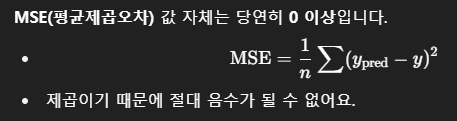

그럼 왜 cross_val_score 는 음수를 반환하나?

👉 cross_val_score는 높은 값이 좋은 점수라고 가정하기 때문입니다!

In [ ]:
#MSE, RMSE: MSE에 루트를 씌운 것
RMSE = np.sqrt(neg_mse_scores * -1) 
np.mean(RMSE), RMSE

(np.float64(5.828658946215839),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [ ]:
# R2: 분산기반의 예측성능, 1에 가까울수록 예측 정확도가 높다.(결정게수)
r2_score = cross_val_score(lr, X,y, scoring = 'r2',cv = 5)
r2_score , np.mean(r2_score)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958735))

오차가 커지고, 결정계수는 작아진 결과


# 다항회귀모델
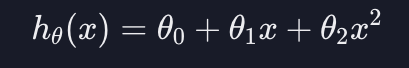

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

model_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear", LinearRegression())
])

model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [24]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test,pred_poly)

np.float64(15.555752307472005)

In [25]:
r2_score(y_test, pred_poly)

np.float64(0.7816647163338353)

2차 ~ 5차 다항회귀시뮬레이션

In [30]:
results = []

for  degree in range(1,5):
    model_poly = Pipeline([
        ("poly", PolynomialFeatures(degree = degree, include_bias=False)),
        ("linear", LinearRegression())
    ])

    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test,pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree':degree,
                'MSE':mse,
                'RMSE':rmse,
                'r2':r2})
pd.DataFrame(results)

,degree,MSE,RMSE,r2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.592348,282.180071,-1116.597912
3,4,170599.948638,413.037466,-2393.483240


위 결과 데이터에 적합한 모델은 3차(디그리:2)가 가장 좋은 회귀방정식을 나타낼 수 있다.